In [1]:
##FASTAI Lesson - 4 
##Neural Net on MNIST dataset to recognize the digit in the images

In [2]:
##Importing all the important libraries

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
##This will help us in plotting using matplotlib

In [5]:
%matplotlib inline

In [6]:
##Importing Fastai libraries

In [7]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.io import *

In [8]:
##Now we are going to download the dataset and then saving it in the path location.

In [9]:
path = 'data/mnist/'

In [10]:
##Now we are creating a folder where we are going to save the downloaded data.

In [11]:
import os 
os.makedirs(path, exist_ok=True)

In [12]:
URL='http://deeplearning.net/data/mnist/'
FILENAME='mnist.pkl.gz'

def load_mnist(filename):
    return pickle.load(gzip.open(filename, 'rb'), encoding='latin-1')

In [13]:
##Pickle and feather_format are both used for loading the python object but feather_format is much more optimal as compare to 
##pickle.

In [14]:
##Downloading the data

In [15]:
get_data(URL+FILENAME, path+FILENAME)
((x,y), (x_valid, y_valid), _) = load_mnist(path+FILENAME)

In [16]:
##Image from the mnist dataset are of 28*28 pixels but they as we load it, get flattened by the numpy for the further processing
##That is why the dimension of the x is 50000, 784 (784 = 28*28).

In [17]:
type(x), x.shape

(numpy.ndarray, (50000, 784))

In [18]:
type(y), y.shape

(numpy.ndarray, (50000,))

# Normalization

In [19]:
##As we know that machine learning algorithms works better when the data is normalized which means the mean of data is 0 and 
##standard_deviation is 1. For this we are going to normalize the data. We are going to substract the mean from each x value 
##and then divide the same by the standard deviation. So we are normalizing the image pixel by pixel

In [20]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
mean = x.mean()
std = x.std()

In [22]:
x = (x-mean)/std
mean, std, x.mean(), x.std()

(0.13044983, 0.3072898, -3.1638146e-07, 0.99999934)

In [23]:
##Since we have normalize our training data so now we have to do the same with validation data but with the same mean and std
##value. So that we can can get equally normalized

In [24]:
x_valid = (x_valid - mean)/std
x_valid.mean(), x_valid.std()

(-0.005850922, 0.99243325)

# Plots

In [25]:
x_valid.shape

(10000, 784)

In [26]:
##So we have 10000 thousand images in the validation setof 28*28 pixels.
##Now we are going to visualize the same but for this we have to deflatten the data.
##For this purpose we are going to use reshape function. We normally left the one dimension as -1 because it will calculate by
##itself.

In [27]:
x_img = np.reshape(x_valid, (-1, 28, 28))
x_img.shape

(10000, 28, 28)

In [28]:
##Defining the show function so that we can visualize the data from our dataset

In [29]:
def show(img, title=None):
    plt.imshow(img, cmap="gray")
    if title is not None: plt.title(title)

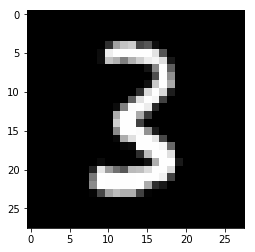

In [30]:
show(x_img[0])

In [31]:
##This shows that the prediction of our neural net for the above image should be 3

In [32]:
y_valid[0]

3

In [33]:
##Now we are going to do the slicing for this we are going to take some columns from 1st image. 

In [34]:
x_img[0,10:15,10:15]

array([[-0.42452, -0.42452, -0.42452, -0.42452,  0.17294],
       [-0.42452, -0.42452, -0.42452,  0.78312,  2.43567],
       [-0.42452, -0.27197,  1.20261,  2.77889,  2.80432],
       [-0.42452,  1.76194,  2.80432,  2.80432,  1.73651],
       [-0.42452,  2.20685,  2.80432,  2.80432,  0.40176]], dtype=float32)

In [35]:
##So we are flattening the data once again into two dimension and then we are picking up the rows from 10 to 14 and columns
##from 10 to 14 and then we are plotting it.

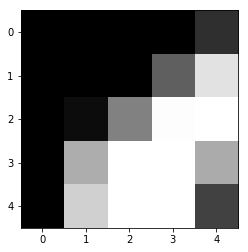

In [36]:
show(x_img[0,10:15,10:15])

In [37]:
##Below is for the 3-d representation

In [38]:
x_img[0:2,10:15,10:15]

array([[[-0.42452, -0.42452, -0.42452, -0.42452,  0.17294],
        [-0.42452, -0.42452, -0.42452,  0.78312,  2.43567],
        [-0.42452, -0.27197,  1.20261,  2.77889,  2.80432],
        [-0.42452,  1.76194,  2.80432,  2.80432,  1.73651],
        [-0.42452,  2.20685,  2.80432,  2.80432,  0.40176]],

       [[ 2.52465, -0.04316, -0.42452, -0.42452, -0.42452],
        [ 2.7916 ,  2.29584, -0.05587, -0.42452, -0.42452],
        [ 1.7238 ,  2.7916 ,  2.33397, -0.10672, -0.42452],
        [-0.25926,  2.00346,  2.80432,  2.34669,  1.26617],
        [-0.42452, -0.24655,  1.38058,  2.80432,  2.7916 ]]], dtype=float32)

In [39]:
x_img

array([[[-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452],
        [-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452],
        [-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452],
        ...,
        [-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452],
        [-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452],
        [-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452]],

       [[-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452],
        [-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452],
        [-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452],
        ...,
        [-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452],
        [-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452],
        [-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452]],

       [[-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.424

In [40]:
##Taking the top 8 images from the validation set along with their y values and the below function is for plotting purpose.

In [41]:
def plots(ims, figsize=(12,6), rows=2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], cmap='gray')

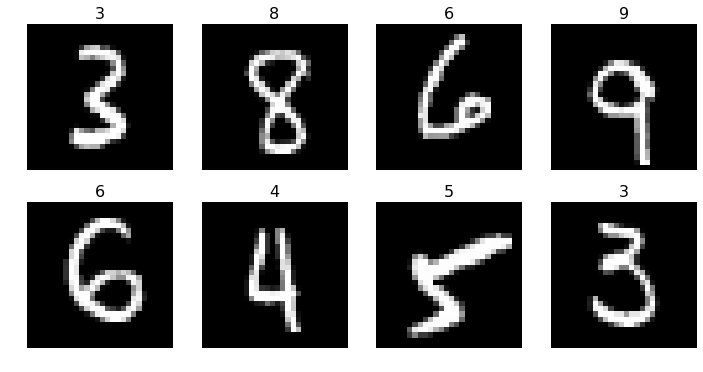

In [42]:
plots(x_img[:8], titles=y_valid[:8])

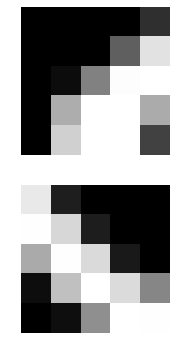

In [43]:
plots(x_img[0:2,10:15,10:15])

# NEURAL NET

In [44]:
##Now we are going to use Pytorch for building the neural net. Pytorch is the replacement of numpy which make the use of GPUs.
##Now we are going to import all the important libraries

In [45]:
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *

In [46]:
##Now we are going to import the torch neural net library

In [47]:
import torch.nn as nn

In [48]:
##Now we are going to create a sequential neural network using the pytorch. 
##Sequential network is simplest neural net in pytorch and it will have the layers in it.
##So the first layer in it is Linear Layer which is y=ax+b. Here this will do the matrix product and input to it is 28*28
##pixel image and the output will be vector of size 10. 
##Next layer is non-linear layer which is LogSoftmax() layer. 
##.cuda() is for tell the pytorch to run this on GPU otherwise it will run on CPU only

In [49]:
net = nn.Sequential(nn.Linear(28*28,10), nn.LogSoftmax()).cuda()

In [50]:
##Now we are going to model the data object which wraps the training data, testing data and validation data together.
##md will return the data object which as wraps all the things and then we are going to fit the data object to the model.
##nn.Linear() is basically doing the metrics multiplication.
##Loss function will be less if we have a good accuracy in prediction.

In [51]:
md = ImageClassifierData.from_arrays(path, (x, y), (x_valid, y_valid))

In [52]:
 x.shape

(50000, 784)

# LOSS FUNCTION

In [53]:
##Now we are going to define the loss function, optimizing algorithm that we are going to use.
##Here we are using Negative log likelihood loss function which is also known as cross entropy.
##It is basically of two types - binary and categorical. Down below is the implementation of binaray loss

In [54]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [55]:
##In acts 1 means cat and 0 means dog. Then we have predicted values like we are 90% sure that it is cat. 80% sure for 
##dog

In [56]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018

# FITTING THE MODEL

In [57]:
loss = nn.NLLLoss()
metrics = [accuracy]
opt = optim.Adam(net.parameters())

In [58]:
##Now we are going to fit the data model.
##net is the neural net that we have built.
##md here is the data object. 
##epoch means number of time we are going over the image in order to train the model
##crit paramerter id for the loss function.
##opt for the optimization that we are going to use.
##metrics means the metrics that we want to print and here it is accuracy metric.

In [59]:
fit(net, md, n_epochs=1, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                     
    0      0.313274   0.286768   0.9186    



[array([0.28677]), 0.9186]

In [60]:
##With this we are getting the accuracy around 91.5% alon with training set and validation set loss.

In [61]:
preds = predict(net, md.val_dl)

In [62]:
preds.shape

(10000, 10)

In [63]:
##10000 for the number of images in validation and 10 because for each image it is giving out the ten prediction.
##Probability of that image is 1 and probability of that image is 2.

In [64]:
preds

array([[ -9.45909,  -4.78881,  -2.61524, ..., -12.97193,  -4.6343 , -11.484  ],
       [-11.37519,  -7.71234,  -5.13008, ...,  -9.24396,  -0.05098,  -8.24528],
       [ -4.47414, -12.2018 ,  -3.32254, ...,  -6.51105,  -9.02763,  -7.14141],
       ...,
       [ -8.09738,  -9.29592, -12.94251, ...,  -7.64305,  -3.85679,  -6.02204],
       [ -2.9698 , -10.57907,  -4.50004, ...,  -6.70381,  -8.08165,  -6.54364],
       [ -2.68676,  -9.10139,  -4.73225, ...,  -5.26603,  -0.21617,  -3.06969]], dtype=float32)

In [65]:
preds.argmax(axis=1)[:5]

array([3, 8, 6, 9, 6])

In [66]:
##This will grab the index of the max value across all the prediction for the first 5 images.

In [67]:
pre = preds.argmax(1)

In [68]:
pre

array([3, 8, 6, ..., 5, 6, 8])

In [69]:
np.mean(pre == y_valid)

0.9186

In [70]:
##This will give the mean value of array and that array will have 1 if our prediction matches the actual value else 0.
##Now we are going to visualize our prediction

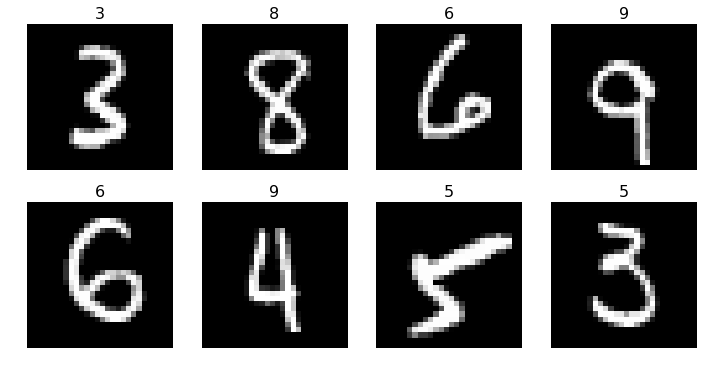

In [71]:
plots(x_img[:8], titles=pre[:8])

In [72]:
##Creating the neural network with the hidden layers

In [73]:
net1 = nn.Sequential(
    nn.Linear(28*28,100),
    nn.ReLU(),
    nn.Linear(100,10),
    nn.LogSoftmax()
).cuda()

In [74]:
##So we are having a Linear layer and non-linear layer which is RelU layer. In this all the -ve value becomes 0 and there
##other types of RelU layer also such as normal ReLU, Leaky ReLU and elu. Then passing the data to the linear layer and
##then using the final non-linear layer which is log softmax layer.

In [75]:
opt = optim.Adam(net1.parameters())

In [76]:
fit(net1, md, n_epochs=1, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                     
    0      0.182224   0.154253   0.9581    



[array([0.15425]), 0.9581]

In [77]:
##Now as we can see that adding the hidden layer will increase the accuracy.

# Deep Neural Net

In [78]:
dnet = nn.Sequential(
    nn.Linear(28*28,100),
    nn.ReLU(),
    nn.Linear(100,100),
    nn.ReLU(),
    nn.Linear(100,10),
    nn.LogSoftmax()
).cuda()

In [79]:
loss = nn.NLLLoss()
metrics = [accuracy]
opt = optim.SGD(dnet.parameters(), 1e-1, momentum=0.9)

In [80]:
fit(dnet, md, n_epochs=1, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                     
    0      0.267927   0.285833   0.9237    



[array([0.28583]), 0.9237]

In [81]:
##Increasing the number of epochs

In [82]:
fit(dnet, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                     
    0      0.301076   0.25604    0.9368    
    1      0.240112   0.232114   0.949                        
    2      0.222613   0.204062   0.9556                       
    3      0.184363   0.204158   0.9548                       
    4      0.196734   0.257004   0.9538                       



[array([0.257]), 0.9538]

In [83]:
##Learning Rate Annealing means as the number of epoch increases decrease the leaning rate so that our model can fit
##better and increases out accuracy

In [84]:
set_lrs(opt, 1e-2)

In [85]:
fit(dnet, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                      
    0      0.076254   0.150017   0.9676    
    1      0.053239   0.144152   0.9698                        
    2      0.056758   0.145026   0.97                          
    3      0.044919   0.144202   0.9711                        
    4      0.05022    0.143906   0.9716                        



[array([0.14391]), 0.9716]

In [86]:
##To see the dimension of all the tensor which is used as parameters in neural net

In [87]:
t = [o.numel() for o in dnet.parameters()]
t

[78400, 100, 10000, 100, 1000, 10]

In [88]:
##So the 1st layer tensor size 784 * 100 (28*28*100) input to the first layer and its bias is 100.
##For 2nd layer tensor size 100 * 100  input to the second layer and its bias is 100.
##For 3rd layer tensor size 100 * 10 input to the third layer and its bias is 10.

In [89]:
##Total size is
sum(t)

89610

In [90]:
##This might lead to the overfitting of data. So to overcome this we make the use of regularization. Most common regular-
##-ization is l2 regularization.
##In regularization we are going to impose penalty on paramter for not being zero.
##If my training loss > validation loss then we are underfitting. So there is no point of regularization.
##This is very good for modern machine learning to overparameterized data and then use regularization.

In [91]:
dnet = nn.Sequential(
    nn.Linear(28*28,100),
    nn.ReLU(),
    nn.Linear(100,100),
    nn.ReLU(),
    nn.Linear(100,10),
    nn.LogSoftmax()
).cuda()

In [92]:
##This is with the regularization weight decay is parameter for regularization.

In [93]:
loss = nn.NLLLoss()
metrics = [accuracy]
opt = optim.SGD(dnet.parameters(), 1e-1, momentum=0.9, weight_decay = 1e-3)

In [94]:
fit(dnet, md, n_epochs=1, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                     
    0      0.2626     0.268021   0.9237    



[array([0.26802]), 0.9237]

In [95]:
set_lrs(opt, 1e-2)

In [96]:
fit(dnet, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                      
    0      0.092474   0.102774   0.9704    
    1      0.081489   0.09635    0.9725                        
    2      0.065877   0.088129   0.9747                        
    3      0.065698   0.086782   0.9747                        
    4      0.049171   0.08137    0.9767                        



[array([0.08137]), 0.9767]

# BUILDING OUR NEURAL NET LAYERS FROM SCRATCH

In [97]:
##So we got 1 worng answer in first 8 images. So till now we have created only 1 layer of logistic regression till now.
##Now we are going to implement the logistic regression (nn.Linear) from scratch without using any layer. 
##For this we are going to implement the pytorch class which will inherit something from the super class nn.Module.
##Below class is the Module of pytorch which can be neuralnet or a layer in neuralnet.
##When you initialize the inherit class you also need to initialize the base class.

In [98]:
torch.randn(3,4).cuda()


 0.8031  0.5418 -0.5479  1.5135
-1.0547 -0.6422  0.5780 -0.8421
-1.1819  0.6323 -1.5566 -0.2214
[torch.cuda.FloatTensor of size 3x4 (GPU 0)]

In [99]:
##This will return the tensor of random number.
def get_weights(*dims): return nn.Parameter(torch.randn(dims)/dims[0])

In [100]:
a = get_weights(10).cuda()
a

Variable containing:
 0.0880
-0.1547
 0.0097
-0.0300
 0.2668
 0.0711
-0.0629
 0.0470
-0.0339
 0.0169
[torch.cuda.FloatTensor of size 10 (GPU 0)]

In [101]:
##In forward function we are reshaping the input data. Means we are flattening it. x.size(0) will return the number of 
##images in dataset and then it will flatten it. After that it will multiply the tensor with the 28*28, 10 dimension
##tensor with random number and then adding the bias and then applying the softmax function.
##matmul is used for matrix multiplication
##softmax function gives us the probability which is very easy for the neural network to learn from it. softmax is good
##for the categorical prediction but for multilabel prediction we use sigmoid function.

In [102]:
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1_w = get_weights(28*28,10) ##layer 1 weight with input 28*28 and gives output of 10 size
        self.l1_b = get_weights(10)  ##layer 1 bias of size 10.
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.matmul(x, self.l1_w) + self.l1_b
        x = torch.log(torch.exp(x)/torch.exp(x).sum(dim=0))
        return x

In [103]:
##Now deploying it.

In [104]:
net2 = LogReg().cuda()
opt = optim.Adam(net2.parameters())

In [105]:
##.parameters() is the thing which pytorch is going to optimize and so pytorch look for something with datatype Parameter
##Here in our case get_weight has a variable with datatype nn.Parameter which create a tensor of random numbers. 
##So pytorch will try to optimize it.
##Fitting the model.

In [106]:
fit(net2, md, n_epochs=1, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                     
    0      2.460336   2.409594   0.9089    



[array([2.40959]), 0.9089]

In [107]:
##We are getting almost same accuracy. Till now we have built the simplest nerual network using the logistic regression
##without any hidden layer. Now we are going to build everything from scratch just like above with the help pytorch.
##We use pytorch because it give us ability to run any code on GPU just by adding .cuda() in the end and it automatically
##differentiate the function.

In [108]:
##Now as we know that md is our dataobject it contain all the image data. So we are going to make it iterator and ask it
##again and again to return the images from complete data. It will always return the image in the batch size of 64 images

In [109]:
dl = iter(md.trn_dl)

In [110]:
xmb, ymb = next(dl)

In [111]:
xmb


-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
          ...             ⋱             ...          
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
[torch.cuda.FloatTensor of size 64x784 (GPU 0)]

In [112]:
##This is the first batch of 64 images and here the most pixels are not zero due to the normalization thing.
##Now we are going to take the variable of our data which is new datatype in pytorch which is the superset of tensor.
##Variable is used to keep the track of all the operations that we have done on tensor so that it can used during the
##derivation time.

In [113]:
vmp = Variable(xmb.cuda())
vmp

Variable containing:
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
          ...             ⋱             ...          
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
[torch.cuda.FloatTensor of size 64x784 (GPU 0)]

In [114]:
##Now we are predicting the values and .exp() because in the end of softmax function we are taking the log of values.
##So to neutralize it.

In [115]:
preds = net2(vmp).exp()
preds

Variable containing:

Columns 0 to 5 
 3.1334e-01  4.0231e-08  1.6148e-04  1.7287e-03  6.0400e-06  1.9477e-03
 2.0093e-05  1.8872e-06  5.5584e-06  2.4495e-04  2.7396e-04  2.3885e-04
 5.8590e-04  1.2963e-01  1.0548e-02  1.2004e-02  3.9168e-04  2.8242e-03
 1.4763e-03  1.1427e-03  4.8672e-02  4.1322e-03  2.2583e-04  5.3069e-05
 1.0576e-02  1.3842e-05  3.1363e-03  4.4513e-03  2.3346e-03  2.8389e-03
 3.9345e-03  3.9868e-04  1.5515e-03  9.4996e-03  1.1349e-02  5.6681e-03
 7.3423e-04  8.8394e-05  3.1289e-03  6.7507e-04  1.3732e-03  1.1786e-03
 9.5900e-05  5.3022e-04  4.1937e-04  1.1740e-03  5.7605e-03  8.8609e-05
 9.0597e-06  1.2557e-07  5.6824e-05  4.8878e-05  7.7532e-05  6.7731e-07
 1.0905e-03  4.9074e-04  1.5303e-03  1.2376e-03  1.9169e-03  6.7520e-04
 4.4442e-04  1.0164e-01  7.7699e-03  1.0697e-02  7.2343e-03  1.3353e-03
 1.1183e-02  2.4779e-05  5.1837e-03  6.8729e-04  8.1139e-03  5.1896e-04
 6.2436e-05  1.4105e-01  6.9952e-03  3.1727e-02  2.5345e-03  1.0464e-02
 3.7222e-04  7.8935e-02  6

In [116]:
##This is actually the probability of 64 images each with 10 probabilities. Retriving the top3.

In [117]:
preds[:3]

Variable containing:

Columns 0 to 5 
 3.1334e-01  4.0231e-08  1.6148e-04  1.7287e-03  6.0400e-06  1.9477e-03
 2.0093e-05  1.8872e-06  5.5584e-06  2.4495e-04  2.7396e-04  2.3885e-04
 5.8590e-04  1.2963e-01  1.0548e-02  1.2004e-02  3.9168e-04  2.8242e-03

Columns 6 to 9 
 2.2860e-05  2.3501e-06  6.5505e-04  1.1109e-05
 5.2236e-07  9.3539e-02  1.3090e-03  7.6722e-03
 1.9066e-03  2.1942e-04  9.8926e-03  8.3403e-04
[torch.cuda.FloatTensor of size 3x10 (GPU 0)]

In [118]:
##Now to check the maximum probabilty across the 10 images. We are taking the index of maximum probability
preds.max(1)[1]

Variable containing:
 0
 7
 1
 2
 7
 7
 6
 9
 8
 7
 1
 8
 1
 1
 0
 7
 6
 7
 9
 7
 0
 8
 5
 6
 7
 8
 9
 7
 4
 7
 8
 1
 1
 2
 2
 5
 9
 5
 8
 1
 8
 9
 3
 6
 7
 1
 5
 0
 8
 6
 9
 9
 8
 3
 6
 5
 3
 1
 5
 5
 0
 4
 9
 2
[torch.cuda.LongTensor of size 64 (GPU 0)]

In [119]:
##Now we are going to visualize the Top 8 output from the prediction

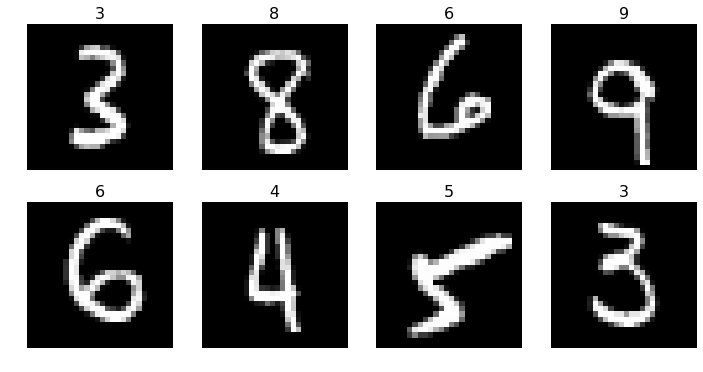

In [120]:
preds = predict(net2, md.val_dl).argmax(1)
plots(x_img[:8], titles=preds[:8])

In [121]:
##So we get the good result but still one is incorrect. But now we are going to write matrix multiplication operator 
##from scratch.

# Broadcasting

In [122]:
##Numpy elementary operations

In [123]:
a = np.array([1,2,3])
b = np.array([4,5,6])
a, b

(array([1, 2, 3]), array([4, 5, 6]))

In [124]:
a + b

array([5, 7, 9])

In [125]:
(a < b)

array([ True,  True,  True])

In [126]:
##In Pytorch 

In [127]:
a = T([1,2,3])
b = T([4,5,6])
a, b

(
  1
  2
  3
 [torch.cuda.LongTensor of size 3 (GPU 0)], 
  4
  5
  6
 [torch.cuda.LongTensor of size 3 (GPU 0)])

In [128]:
a + b


 5
 7
 9
[torch.cuda.LongTensor of size 3 (GPU 0)]

In [129]:
(a < b)


 1
 1
 1
[torch.cuda.ByteTensor of size 3 (GPU 0)]

In [130]:
##Element wise operation doesn't need the for loop. And for loop in python is much slower than in C. Using the pytorch 
##tensor make the used of SIMD along with muliple core to boost the performance and running it on GPU make it 100x more
##faster

In [131]:
##Broadcasting mean copying the value of my one or more axis in order to make it dimensionally equal to the other tensor
##Broadcasting by scalar example

In [132]:
a


 1
 2
 3
[torch.cuda.LongTensor of size 3 (GPU 0)]

In [133]:
a < 2


 1
 0
 0
[torch.cuda.ByteTensor of size 3 (GPU 0)]

In [134]:
##Here a is rank1 tensor and 2 is rank0 tensor or scalar. So it will broadcast the value of rank0 tensor to make it rank1
##tensor. Now scalar value is [2,2,2] and then it will do the operations.

In [135]:
a + 1


 2
 3
 4
[torch.cuda.LongTensor of size 3 (GPU 0)]

In [136]:
##Broadcasting a vector to matrix

In [137]:
m = np.array([[1,2,3], 
    [4,5,6],
    [7,8,9]])

In [138]:
m

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [139]:
c = np.array([10,20,30])

In [140]:
c

array([10, 20, 30])

In [141]:
c + m

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

In [142]:
##Here c is broadcasted into rank2 tensor from rank1 tensor.

In [143]:
c.shape

(3,)

In [144]:
np.broadcast_to(c, m.shape)

array([[10, 20, 30],
       [10, 20, 30],
       [10, 20, 30]])

In [145]:
##Above will tell you how the rank1 tensor get broadcasted for addition with m.

In [146]:
c[None]

array([[10, 20, 30]])

In [147]:
c[:,None]

array([[10],
       [20],
       [30]])

In [148]:
c[None].shape

(1, 3)

In [149]:
c[:,None].shape

(3, 1)

In [150]:
np.broadcast_to(c[None], m.shape)

array([[10, 20, 30],
       [10, 20, 30],
       [10, 20, 30]])

In [151]:
np.broadcast_to(c[:,None], m.shape)

array([[10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [152]:
c[None] * c[:,None]

array([[100, 200, 300],
       [200, 400, 600],
       [300, 600, 900]])

In [153]:
##So now we are going to make the use of broadcasting in order to built much more efficient matrix multiplication.

In [154]:
m  ##rank2 tensor

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [155]:
c  ##rank1 tensor

array([10, 20, 30])

In [156]:
m @ c  ##1*10 + 2*20 + 3*30 = 140

array([140, 320, 500])

In [157]:
##This was for numpy. But for pytorch

In [158]:
torch.matmul(torch.from_numpy(m), torch.from_numpy(c))


 140
 320
 500
[torch.LongTensor of size 3]

In [159]:
m * c

array([[ 10,  40,  90],
       [ 40, 100, 180],
       [ 70, 160, 270]])

In [160]:
##But this is not matrix multiplication. This is element wise multiplication but using broadcasting.
##See but if we will add each element across the rows then we get the same product.

In [161]:
c.shape

(3,)

In [162]:
(m * c).sum(axis=1)

array([140, 320, 500])

In [163]:
##But the above is matrix multiplication but for the single columns. Now we will expand this for all the columns

In [164]:
n = np.array([[10,40],[20,0],[30,-5]])
n

array([[10, 40],
       [20,  0],
       [30, -5]])

In [165]:
n.shape

(3, 2)

In [166]:
m @ n

array([[140,  25],
       [320, 130],
       [500, 235]])

In [167]:
##Doing the matrix multiplication for columns 1 and columns 2

In [168]:
(m * n[:,0]).sum(axis=1)

array([140, 320, 500])

In [169]:
(m * n[:,1]).sum(axis=1)

array([ 25, 130, 235])

In [170]:
##Integrating our 

In [171]:
# Our code from above
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1_w = get_weights(28*28, 10)  # Layer 1 weights
        self.l1_b = get_weights(10)         # Layer 1 bias

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = x @ self.l1_w + self.l1_b 
        return torch.log(torch.exp(x)/torch.exp(x).sum(dim=0))

net2 = LogReg().cuda()
opt=optim.Adam(net2.parameters())

fit(net2, md, n_epochs=1, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                     
    0      2.460079   2.40538    0.9064    



[array([2.40538]), 0.9064]

In [172]:
##So till now we are using the fit() function. But now we are going to write our own training loop.
##This loop will grab the mini-batch of data each time and then we pass it to the optimizer and then it will come with 
##slightly better prediction for this mini-batch.

In [173]:
net2 = LogReg().cuda()
loss = nn.NLLLoss()
learning_rate = 1e-3
optimizer = optim.Adam(net2.parameters(), lr = learning_rate)

In [174]:
##So to take the data from md in the form of mini-batch of 64 images we are going to do folllowing.

In [175]:
dl = iter(md.trn_dl)

In [176]:
##For grabbing the data again and again we will use next() function and then we will predicted the values.

In [177]:
xt, yt = next(dl)
preds = net2(Variable(xt).cuda())

In [178]:
preds

Variable containing:
-4.1400 -4.1333 -4.1161 -4.1346 -4.1376 -4.1350 -4.1313 -4.2016 -4.1291 -4.1660
-4.1946 -4.1767 -4.2037 -4.1672 -4.1878 -4.1414 -4.1949 -4.1153 -4.1684 -4.1490
-4.1384 -4.1425 -4.1780 -4.1830 -4.1893 -4.1518 -4.1490 -4.1741 -4.1334 -4.1702
-4.1653 -4.1480 -4.1811 -4.1289 -4.1646 -4.1561 -4.1538 -4.1604 -4.1549 -4.2168
-4.1717 -4.1640 -4.1686 -4.1745 -4.1600 -4.1536 -4.1504 -4.1425 -4.1766 -4.1684
-4.1611 -4.2129 -4.1408 -4.1435 -4.1640 -4.1315 -4.2003 -4.1592 -4.1707 -4.1800
-4.1803 -4.1717 -4.1679 -4.2227 -4.1571 -4.1710 -4.2250 -4.1460 -4.1613 -4.1687
-4.1714 -4.1719 -4.1462 -4.1465 -4.1463 -4.1754 -4.2136 -4.1701 -4.1625 -4.1460
-4.0928 -4.1701 -4.1559 -4.1543 -4.1416 -4.1946 -4.1693 -4.1666 -4.1554 -4.1691
-4.1266 -4.1736 -4.2084 -4.1613 -4.1843 -4.1940 -4.1565 -4.1047 -4.1774 -4.1601
-4.1407 -4.1661 -4.1840 -4.2095 -4.1553 -4.1616 -4.1295 -4.1689 -4.1724 -4.1302
-4.1557 -4.1117 -4.1702 -4.1707 -4.1973 -4.1786 -4.1472 -4.1285 -4.1236 -4.1748
-4.1825 -4.1377 -4.

In [179]:
##Calculating the loss on the GOU only

In [180]:
l = loss(preds, Variable(yt).cuda())

In [181]:
l

Variable containing:
 4.1609
[torch.cuda.FloatTensor of size 1 (GPU 0)]

In [182]:
##To zero all the gradients before update

In [183]:
optimizer.zero_grad()

In [184]:
##To calculate the derivative of the loss function or the gradient of the loss function.

In [185]:
l.backward()

In [186]:
##This above calculate the gradient and learning should not be too small otherwise it will take forever to reach the 
##result and similarly not too big otherwise it will skip the minimal values.
##This will update the learning rate and other parameters of optimizers

In [187]:
optimizer.step()

In [188]:
xt, yt = next(dl)
preds = net2(Variable(xt).cuda())

In [189]:
preds

Variable containing:
-4.1288 -4.2497 -4.0549 -4.2150 -4.1021 -4.2172 -4.1104 -4.2200 -4.2175 -4.0583
-4.1210 -4.2142 -4.1834 -4.0215 -4.2134 -4.2144 -4.2268 -4.1475 -4.1497 -4.2017
-4.0533 -4.2274 -4.1380 -4.2404 -4.2682 -4.2366 -4.2737 -4.1907 -4.2097 -4.1447
-4.2071 -4.2425 -4.2611 -4.1797 -4.0662 -4.1261 -4.1347 -4.0936 -4.1538 -4.0382
-4.2169 -4.0689 -4.2074 -4.2376 -4.1245 -4.1363 -4.1515 -4.0944 -4.1888 -4.2028
-4.0091 -4.2516 -4.1934 -4.1552 -4.2557 -4.1480 -4.3113 -4.1268 -4.1169 -4.1200
-4.1111 -4.2882 -4.2820 -4.2431 -4.1129 -4.1390 -4.1776 -4.0045 -4.2670 -3.9988
-4.2411 -4.1937 -4.1876 -4.2651 -4.1111 -4.2321 -4.2327 -4.0006 -4.1188 -4.0738
-4.0920 -4.1624 -4.1367 -4.1642 -4.0946 -4.1880 -4.0576 -4.2196 -4.1452 -4.1729
-4.3245 -3.9054 -4.1957 -4.1861 -4.1506 -4.2180 -4.1434 -4.1287 -4.1519 -4.2287
-3.8256 -4.4228 -4.1160 -4.1497 -4.3461 -4.1686 -4.1332 -4.1696 -4.3413 -4.0720
-4.2182 -4.0743 -4.2085 -4.1995 -4.1863 -4.0253 -4.2418 -4.1547 -4.1402 -4.2443
-4.1212 -4.2126 -4.

In [190]:
l = loss(preds, Variable(yt).cuda())
l

Variable containing:
 4.0242
[torch.cuda.FloatTensor of size 1 (GPU 0)]

In [191]:
##Now completing the training loop

In [192]:
for t in range(100):
    xt, yt = next(dl)
    y_pred = net2(Variable(xt).cuda())
    l = loss(y_pred, Variable(yt).cuda())
    
    if t % 10 == 0:
        accuracy = np.mean(to_np(y_pred).argmax(axis=1) == to_np(yt))
        print("loss: ", l.data[0], "\t accuracy: ", accuracy)

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

loss:  4.031623840332031 	 accuracy:  0.625
loss:  3.2291362285614014 	 accuracy:  0.734375
loss:  2.8427939414978027 	 accuracy:  0.78125
loss:  2.9667036533355713 	 accuracy:  0.703125
loss:  2.7820510864257812 	 accuracy:  0.765625
loss:  2.7035868167877197 	 accuracy:  0.8125
loss:  2.6967415809631348 	 accuracy:  0.828125
loss:  2.697202205657959 	 accuracy:  0.875
loss:  2.584951162338257 	 accuracy:  0.859375
loss:  2.6495492458343506 	 accuracy:  0.84375


In [193]:
##Taking the next min-batch. calculating the prediciton and loss and for every 10 step we are printing out the accuracy.
##Then resetting back the gradient back to 0. Then agagin calculating the gradients and then update the weight using the
##gradient and the learning rate.

##As we go ahead in learning loss goes down and accuracy goes up.
##Score function for the calculation of score on predicted values. Count function to count the length of iterator.

In [194]:
def score(x, y):
    y_pred = to_np(net2(V(x)))
    return np.sum(y_pred.argmax(axis=1) == to_np(y))/len(y_pred)

In [195]:
def count(iter, key=None):
    if key:
        if callable(key):
            return sum(bool(key(x)) for x in iter)
        return sum(x == key for x in iter)
    try:
        return len(iter)
    except TypeError:
        return sum(1 for _ in iter)

In [196]:
k = count(md.trn_dl)
k

782

In [197]:
m = count(md.val_dl)
m

157

In [198]:
##Combinig all the things we get the following

In [199]:
net2 = LogReg().cuda()
loss=nn.NLLLoss()
learning_rate = 1e-2
optimizer=optim.SGD(net2.parameters(), lr=learning_rate)

for epoch in range(1):  ##Epoch number of time we are going to process the complete dataset
    losses=[]
    dl = iter(md.trn_dl)
    for t in range(0,k):
        # Forward pass: compute predicted y and loss by passing x to the model.
        xt, yt = next(dl)
        y_pred = net2(V(xt))
        l = loss(y_pred, V(yt))
        losses.append(l)

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable weights of the model)
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model parameters
        l.backward()

        # Calling the step function on an Optimizer makes an update to its parameters
        optimizer.step()
    
    val_dl = iter(md.val_dl)
    val_scores = [score(*next(val_dl)) for i in range(0,157)]
    print(np.mean(val_scores))

0.9037619426751592


In [200]:
##Now we are going to code the optimizer by ourselves.

# Stochastic Gradient Descent

In [201]:
##So we have already define the layer of our neural net and also the loss function and learning rate.
##Now since we are going to write the optimizer which update the bias and weight after a iteration through each min-batch
##For l.backward() we are taking the tensor value and then we are substracting the gradient of tensor * learning rate
##from the original tensor value. In this way l.backward works and for optimizer.zero_grad() we are putting gradient 
##value back to zero.

In [202]:
net2 = LogReg().cuda()  
loss_fn=nn.NLLLoss()
lr = 1e-2
w,b = net2.l1_w,net2.l1_b    ##weight and bias value from LogReg() function

for epoch in range(1):
    losses=[]
    dl = iter(md.trn_dl)
    for t in range(0,k):
        xt, yt = next(dl)
        y_pred = net2(V(xt))
        l = loss(y_pred, Variable(yt).cuda())
        losses.append(loss)

        # Backward pass: compute gradient of the loss with respect to model parameters
        l.backward()                                       ##calculating the gradient value of weight, and bias
        w.data -= w.grad.data * lr                         ##updating the weight value (tensor update)
        b.data -= b.grad.data * lr                         ##updating the bias value 
        
        w.grad.data.zero_()                                ##Putting the value of gradient equal to zero. 
        b.grad.data.zero_()   

    val_dl = iter(md.val_dl)
    val_scores = [score(*next(val_dl)) for i in range(0,m)]
    print(np.mean(val_scores))

0.9019705414012739


OUR FIT FUNCTION IS-

    for epoch in range(1):
        losses=[]
        dl = iter(md.trn_dl)
        for t in range(0,k):
            xt, yt = next(dl)
            y_pred = net2(V(xt))
            l = loss(y_pred, Variable(yt).cuda())
            losses.append(loss)

            # Backward pass: compute gradient of the loss with respect to model parameters
            l.backward()                                       ##calculating the gradient value of weight, and bias
            w.data -= w.grad.data * lr                         ##updating the weight value (tensor update)
            b.data -= b.grad.data * lr                         ##updating the bias value 

            w.grad.data.zero_()                                ##Putting the value of gradient equal to zero. 
            b.grad.data.zero_()   

        val_dl = iter(md.val_dl)
        val_scores = [score(*next(val_dl)) for i in range(0,m)]
        print(np.mean(val_scores))

OUR optimizer.step() IS - 

        w.data -= w.grad.data * lr                         ##updating the weight value (tensor update)
        b.data -= b.grad.data * lr                         ##updating the bias value 

l.backward() is remain same as l.backward() and is used for calculating gradients

OUR optimizer.zero_grad() IS -

        w.grad.data.zero_()                                ##Putting the value of gradient equal to zero. 
        b.grad.data.zero_() 

FOR CALCULATING LOSS - 

        l = loss(y_pred, Variable(yt).cuda())
        losses.append(loss)

FOR LogSoftmax() IS -
    
    x = torch.log(torch.exp(x)/torch.exp(x).sum(dim=0))

FOR Linear() IS -

    x = torch.matmul(x, self.l1_w) + self.l1_b